# Regression

## What is sklearn?
[Scikit-Learn](https://scikit-learn.org/stable/) is a Python module for machine learning built on top of SciPy and is distributed under the 3-Clause BSD license.

The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed.

**Scikit family**:
* [scikit-image](https://scikit-image.org/)
* [scikit-llm](https://skllm.beastbyte.ai/)
* [Intel_Extension_for_scikit-learn](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html#gs.ld9v3r)

## How to install Scikit-learn?
We will use our magic word `pip` --> `pip install scikit-learn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

## Example 1: Simple Linear Regression 
In this example, I demonstrate how to use Linear Regression from scikit-learn to predict the price of a house based on the number of rooms.

In [2]:
data = np.array([[1, 150000],
                 [2, 200000],
                 [4, 300000],
                 [5, 350000]])

df = pd.DataFrame(data, columns=['Number_of_rooms', 'Price'])

df.head()

,Number_of_rooms,Price
0,1,150000
1,2,200000
2,4,300000
3,5,350000


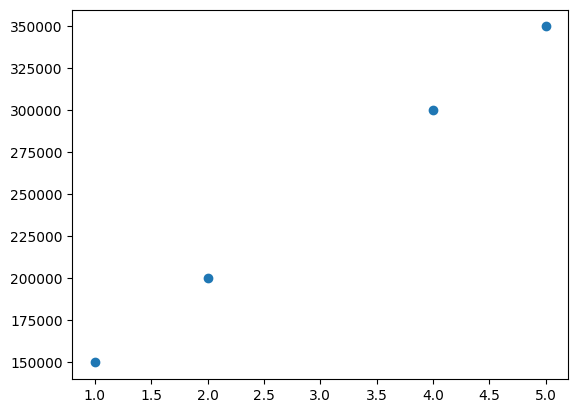

In [3]:
plt.scatter(df['Number_of_rooms'], df['Price']);

In [4]:
X = df[["Number_of_rooms"]]
Y = df["Price"]

LR = LinearRegression()

LR.fit(X, Y)

predicted_price = LR.predict(pd.DataFrame([[3]], columns=["Number_of_rooms"]))[0]
print("Price of 3 rooms house is", predicted_price, "$")

Price of 3 rooms house is 250000.0 $


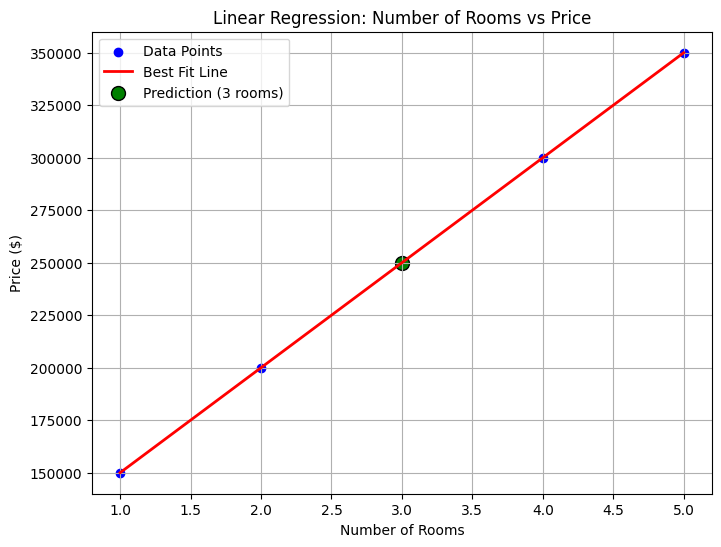

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points')

x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = LR.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Fit Line')

plt.scatter(3, predicted_price, color='green', s=100, edgecolor='black', label='Prediction (3 rooms)')

plt.title("Linear Regression: Number of Rooms vs Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

## Example 2: SVD vs Gradient Descent 

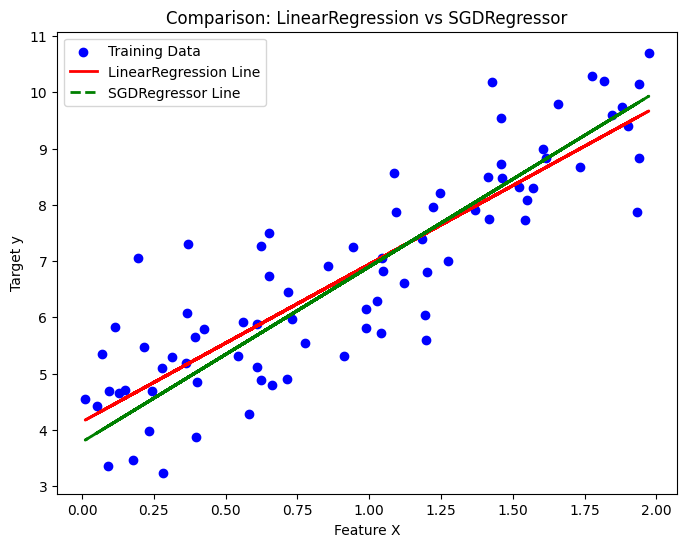

Performance Comparison:
LinearRegression MSE: 0.6537
LinearRegression MAE: 0.5913

SGDRegressor MSE: 0.7566
SGDRegressor MAE: 0.6880

LinearRegression Intercept: 4.14
LinearRegression Coefficient: 2.80
SGDRegressor Intercept: 3.78
SGDRegressor Coefficient: 3.11


In [17]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# SGD Regressor 
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train.ravel())
y_pred_sgd = sgd_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# LinearRegression line
plt.plot(X_train, lin_reg.predict(X_train), color='red', linewidth=2, label='LinearRegression Line')

# SGDRegressor line
plt.plot(X_train, sgd_reg.predict(X_train), color='green', linewidth=2, linestyle='--', label='SGDRegressor Line')

plt.title('Comparison: LinearRegression vs SGDRegressor')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()

# Metrics for LinearRegression
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Metrics for SGDRegressor
mse_sgd = mean_squared_error(y_test.ravel(), y_pred_sgd)
mae_sgd = mean_absolute_error(y_test.ravel(), y_pred_sgd)

print("Performance Comparison:")
print(f"LinearRegression MSE: {mse_lin:.4f}")
print(f"LinearRegression MAE: {mae_lin:.4f}\n")

print(f"SGDRegressor MSE: {mse_sgd:.4f}")
print(f"SGDRegressor MAE: {mae_sgd:.4f}")

# learned parameters
print(f"\nLinearRegression Intercept: {lin_reg.intercept_[0]:.2f}")
print(f"LinearRegression Coefficient: {lin_reg.coef_[0][0]:.2f}")

print(f"SGDRegressor Intercept: {sgd_reg.intercept_[0]:.2f}")
print(f"SGDRegressor Coefficient: {sgd_reg.coef_[0]:.2f}")

![Cost_function1](assets\mlst_0405.png)

![Cost_function2](assets\challenges-1.png)